In the RNN LSTM example, research and answer the following questions:

(a) What is the data in the train.tsv and test.tsv files, and what is the purpose of this analysis?

(b) What kind of text preprocessing is done in the code? Show the data (a few rows) before and after the preprocessing

(c) Explain the architecture of the RNN model used in the code, run it and report the results.

(d) Modify the architecture to improve the default model that is in the code. Explain what steps you took to try to improve the accuracy of the default model. (If none of the steps improved the model present the results of the “best” attempt to improve the model, and explain the changes that you tried).

In [58]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Embedding, LSTM, GlobalMaxPooling1D, SpatialDropout1D
import os

In [59]:
os.chdir('/Users/alisdghnia/Desktop/movie-review-sentiment-analysis-kernels-only/')

### What is the data in the train.tsv and test.tsv files, and what is the purpose of this analysis?

The data is reviews on movies and the purpose of this analysis is to figure out the sentiment of the texts (good or bad, positive or negative) and then train a model from the training set and be able to use the model on the test data to analyze the sentiments and predict the number for the sentiment (0-4)

In [60]:
df_train = pd.read_csv('train.tsv', sep='\t')

print('train set: {0}'.format(df_train.shape))
df_train.head(10)

train set: (156060, 4)


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [66]:
df_train.iloc[:,3].unique()

array([1, 2, 3, 4, 0])

In [67]:
df_test = pd.read_csv('test.tsv', sep='\t')

print('test set: {0}'.format(df_test.shape))
df_test.head(10)

test set: (66292, 3)


,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
5,156066,8545,intermittently pleasing but
6,156067,8545,intermittently pleasing
7,156068,8545,intermittently
8,156069,8545,pleasing
9,156070,8545,but


In [68]:
for i in df_train.iloc[:, 2]:
    if len(i) > 260:
        print(i)

Notwithstanding my problem with the movie 's final half hour , I 'm going to recommend SECRETARY , based on the wonderful acting clinic put on by Spader and Gyllenhaal , and also the unique way Shainberg goes about telling what at heart is a sweet little girl -
For every cheesy scene , though , there is a really cool bit -- the movie 's conception of a future-world holographic librarian -LRB- Orlando Jones -RRB- who knows everything and answers all questions , is visually smart , cleverly written , and nicely realized .
-LRB- City -RRB- reminds us how realistically nuanced a Robert De Niro performance can be when he is not more lucratively engaged in the shameless self-caricature of ` Analyze This ' -LRB- 1999 -RRB- and ` Analyze That , ' promised -LRB- or threatened -RRB- for later this year .
reminds us how realistically nuanced a Robert De Niro performance can be when he is not more lucratively engaged in the shameless self-caricature of ` Analyze This ' -LRB- 1999 -RRB- and ` Analy

In [69]:
replace_list = {r"'m": 'am',
                r"'re": ' are',
                r"let’s": 'let us',
                r"'s":  ' is',
                r"'ve": ' have',
                r"can't": 'can not',
                r"cannot": 'can not',
                r"shan’t": 'shall not',
                r"n't": ' not',
                r"'d": ' would',
                r"'ll": ' will',
                r"'scuse": 'excuse',
                ',': ' ,',
                '.': ' .',
                '!': ' !',
                '?': ' ?',
                '\s+': ' '}
def clean_text(text):
    text = text.lower()
    for s in replace_list:
        text = text.replace(s, replace_list[s])
    text = ' '.join(text.split())
    return text

In [70]:
X_train = df_train['Phrase'].apply(lambda p: clean_text(p))

In [71]:
for i in X_train:
    if len(i) > 260:
        print(i)

notwithstanding my problem with the movie is final half hour , i am going to recommend secretary , based on the wonderful acting clinic put on by spader and gyllenhaal , and also the unique way shainberg goes about telling what at heart is a sweet little girl -
for every cheesy scene , though , there is a really cool bit -- the movie is conception of a future-world holographic librarian -lrb- orlando jones -rrb- who knows everything and answers all questions , is visually smart , cleverly written , and nicely realized .
-lrb- city -rrb- reminds us how realistically nuanced a robert de niro performance can be when he is not more lucratively engaged in the shameless self-caricature of ` analyze this ' -lrb- 1999 -rrb- and ` analyze that , ' promised -lrb- or threatened -rrb- for later this year .
reminds us how realistically nuanced a robert de niro performance can be when he is not more lucratively engaged in the shameless self-caricature of ` analyze this ' -lrb- 1999 -rrb- and ` analy

### What kind of text preprocessing is done in the code? Show the data (a few rows) before and after the preprocessing

As it can be seen in the big texts I have found in the training dataset, the preprocessing in the code above for the function clean_text, replaces the items put in the dictionary as it is described. the words are also lowered. and also punctuations are spaced out from letters.

Instead of multiple rows I found a long paragraph to see as much as possible!

max phrase len: 53


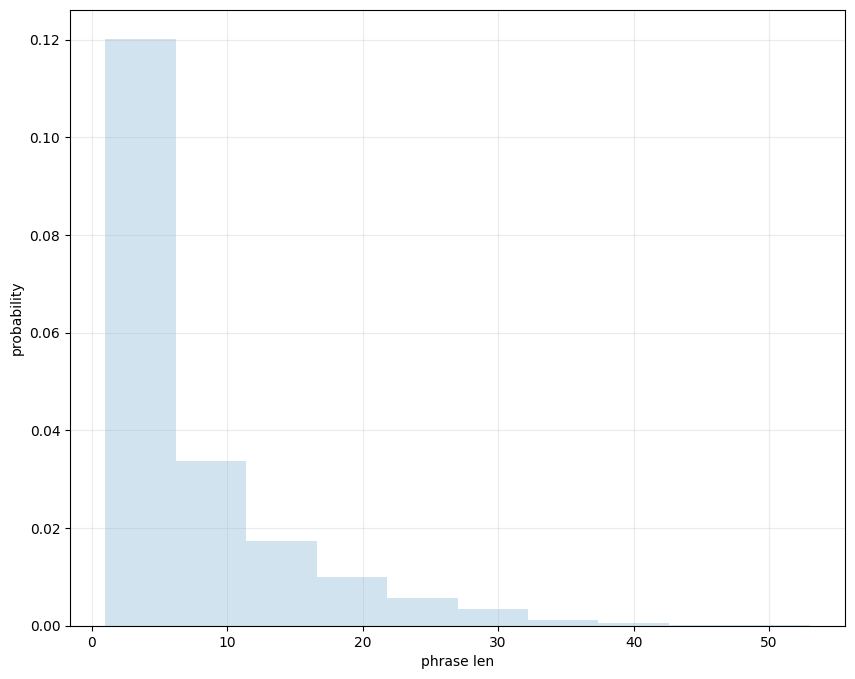

In [72]:
phrase_len = X_train.apply(lambda p: len(p.split(' ')))
max_phrase_len = phrase_len.max()
print('max phrase len: {0}'.format(max_phrase_len))
plt.figure(figsize = (10, 8))
plt.hist(phrase_len, alpha = 0.2, density = True)
plt.xlabel('phrase len')
plt.ylabel('probability')
plt.grid(alpha = 0.25)

In [73]:
y_train = df_train['Sentiment']

This is also another part of the preprocessing of the data! Tokenizing the words so that they are assigned to specific numbers and also pad them meaning that they all become same length of series of numbers that represent all sentences.

In [74]:
max_words = 8192
tokenizer = Tokenizer(
    num_words = max_words,
    filters = '"#$%&()*+-/:;<=>@[\]^_`{|}~'
)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train, maxlen = max_phrase_len)
y_train = to_categorical(y_train)

In [75]:
#Hyperparameters
batch_size = 512
epochs = 8

### Explain the architecture of the RNN model used in the code, run it and report the results.

the input length for the model will be the maximum phrase length that was pad_sequenced in the preprocessing, output will be 256 features for each word in sentences and input is tha max words which was set to 8192.

Then SpatialDropout of 0.3 will take place and what spatial dropout does that is different to dropout is that, spatial dropout will stick to the same place of the word that has been muted.

Then LSTM model is run with 0.3 dropout, and units of 256. with recurrent dropout I think instead of droping words in sentences, it drops the sentences in paragraphs.

Then a dense layer with activation function ReLU (as explained in assignment 3)

Dense layer to 5 because there are only 5 levels for the review (0-4) with softmax activation.

Same loss function and optimizer as last assignment as well!

In [78]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim = max_words, output_dim = 128, input_length = max_phrase_len))
model_lstm.add(SpatialDropout1D(0.3))
model_lstm.add(LSTM(128, dropout = 0.3, recurrent_dropout = 0.3))
model_lstm.add(Dense(128, activation = 'relu'))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(5, activation = 'softmax'))
model_lstm.compile(
    loss='categorical_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

In [81]:
history = model_lstm.fit(
    X_train,
    y_train,
    validation_split = 0.1,
    epochs = 12,
    batch_size = 128
)

Epoch 1/12
1098/1098 [==============================] - 92s 84ms/step - loss: 0.9194 - accuracy: 0.6321 - val_loss: 0.9933 - val_accuracy: 0.6028
Epoch 2/12
1098/1098 [==============================] - 93s 84ms/step - loss: 0.8285 - accuracy: 0.6673 - val_loss: 0.9951 - val_accuracy: 0.6018
Epoch 3/12
1098/1098 [==============================] - 90s 82ms/step - loss: 0.7882 - accuracy: 0.6800 - val_loss: 0.9972 - val_accuracy: 0.6085
Epoch 4/12
1098/1098 [==============================] - 89s 81ms/step - loss: 0.7565 - accuracy: 0.6931 - val_loss: 1.0176 - val_accuracy: 0.6102
Epoch 5/12
1098/1098 [==============================] - 92s 84ms/step - loss: 0.7335 - accuracy: 0.7010 - val_loss: 1.0279 - val_accuracy: 0.6091
Epoch 6/12
1098/1098 [==============================] - 107s 97ms/step - loss: 0.7144 - accuracy: 0.7075 - val_loss: 1.0585 - val_accuracy: 0.6082
Epoch 7/12
1098/1098 [==============================] - 106s 96ms/step - loss: 0.6993 - accuracy: 0.7123 - val_loss: 1.0886

### Modify the architecture to improve the default model that is in the code. Explain what steps you took to try to improve the accuracy of the default model. (If none of the steps improved the model present the results of the “best” attempt to improve the model, and explain the changes that you tried).

I lowered the batch size and the dimensions as well due to how slow the process of training the model was; however I added extra epoch and changed from 8 to 12 to maybe account for the decrease in those numbers but still not successful and the model was actually not doing as good as the one already provided

Main issue is the fact that Validation loss and accuracy are not moving desirably and I believe if the validation split is increased in the model fitting phase, maybe from 0.1 to 0.2-0.3 I think those values also start improving more as it wouldnt be overfitting the training set.

In [82]:
 # serialize model to JSON
model_json = model_lstm.to_json()
with open("rnn_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_lstm.save_weights("rnn_model.h5")
print("Saved model to disk")

Saved model to disk


In [83]:
# load json and create model
json_file = open('rnn_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("rnn_model.h5")
print("Loaded model from disk")

Loaded model from disk


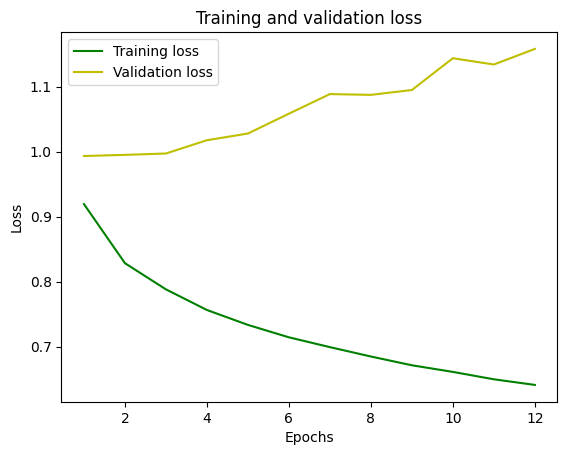

In [84]:
plt.clf()
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

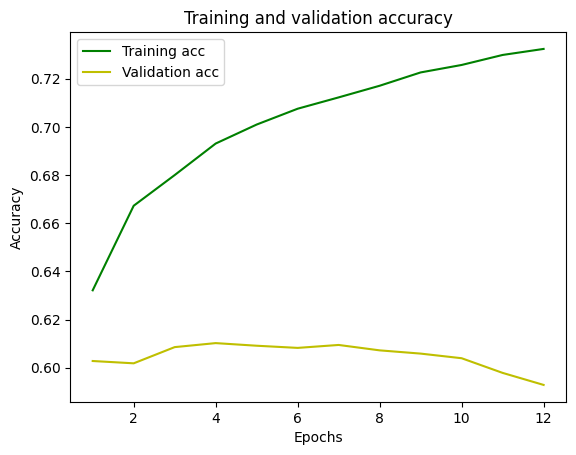

In [85]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'y', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()